In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('G:/AI lectures/Datasets/house_prices.csv')

# Drop irrelevant columns or columns with non-numeric values
data = data.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1)

# Perform one-hot encoding on categorical variables
data = pd.get_dummies(data, columns=['waterfront', 'view', 'condition',])

# Separate the features (X) and the target variable (y)
X = data.drop('price', axis=1)
y = data['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the mode
score = model.score(X_test, y_test)
print("R-squared score:", score)


R-squared score: 0.03146970377804459


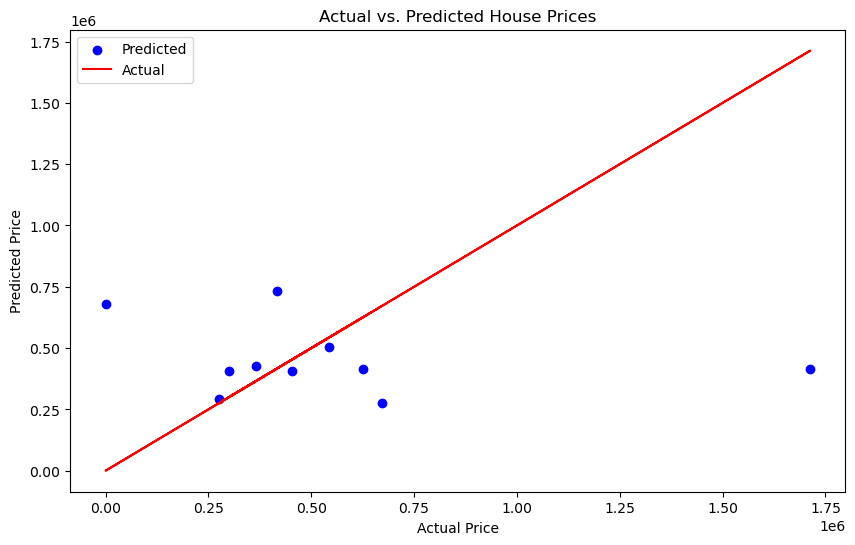

In [5]:
import matplotlib.pyplot as plt

# Predict prices for new data
new_data = X_test.sample(10)  # Select 10 random samples from the test set
new_predictions = model.predict(new_data)

# Plot actual prices vs
plt.figure(figsize=(10, 6))
plt.scatter(y_test[:10], new_predictions, color='b', label='Predicted')
plt.plot(y_test[:10], y_test[:10], color='r', label='Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted House Prices')
plt.legend()
plt.show()


Mean Squared Error: 986704654767.0098
Mean Absolute Error: 210379.20780416526


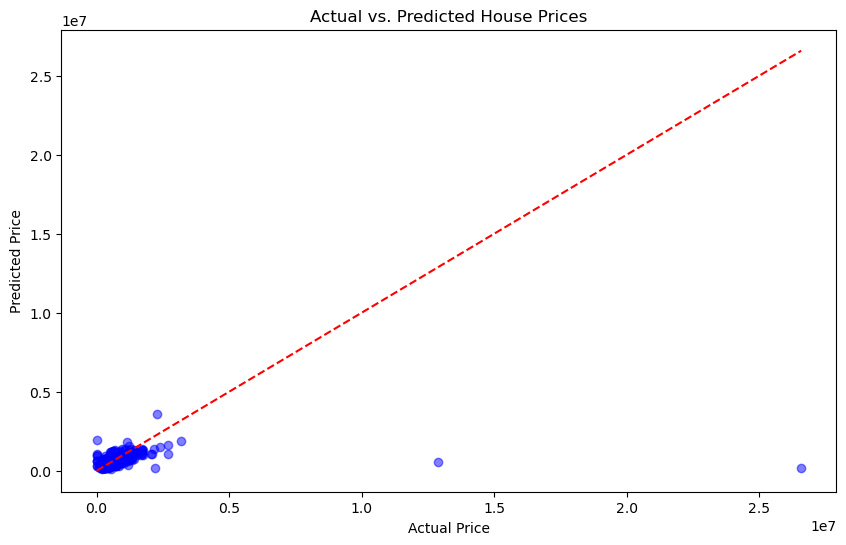

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('G:/AI lectures/Datasets/house_prices.csv')

data = data.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1)

data = pd.get_dummies(data, columns=['waterfront', 'view', 'condition'])

X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ridge = Ridge()
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

# Make predictions on the 
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Visualize the actual prices vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted House Prices')
plt.show()
